<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bar Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be provided to you in the form of an RDBMS.

You will use SQL queries to extract the necessary data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data

-   Visualize the relationship between two features

-   Visualize the composition of data

-   Visualize comparison of data


## Setup: Working with the Database
**Install the needed libraries**


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install numpy
!pip install scikit-learn

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 147.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 210.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 83.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 78.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 35.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 74.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 134.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 176.4 MB/s eta 0:00:0000:01


**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [2]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


--2025-06-01 19:32:41--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  59.1MB/s    in 2.6s    

2025-06-01 19:32:44 (59.1 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Visualizing Data Distributions


##### 1. Histogram of `ConvertedCompYearly`


Visualize the distribution of yearly compensation (`ConvertedCompYearly`) using a histogram.



In [4]:
## Write your code here
# Step 1: Drop NaN values from CompTotal
comp = df['CompTotal'].dropna()

# Step 2: Calculate Q1 and Q3
Q1 = comp.quantile(0.25)
Q3 = comp.quantile(0.75)
IQR = Q3 - Q1

# Step 3: Filter out values above Q3 (i.e., remove upper outliers)
filtered_df = df[(df['CompTotal'] <= Q3)]

# Optional: Check how many rows remain
print(f"Remaining rows after filtering: {len(filtered_df)}")


Remaining rows after filtering: 25480


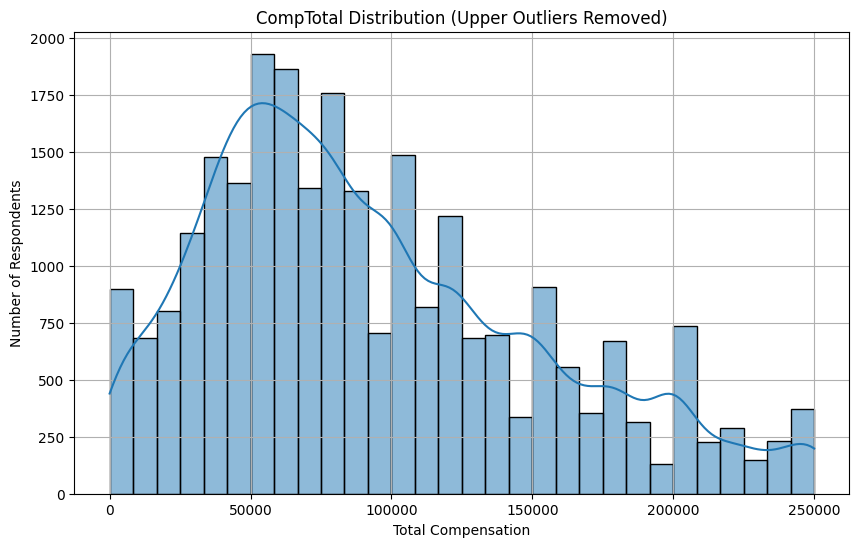

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['CompTotal'], bins=30, kde=True)
plt.title('CompTotal Distribution (Upper Outliers Removed)')
plt.xlabel('Total Compensation')
plt.ylabel('Number of Respondents')
plt.grid(True)
plt.show()

##### 2. Box Plot of `Age`


Since `Age` is categorical in the dataset, convert it to numerical values for a box plot.



In [6]:
# Step 1: Map age ranges to approximate midpoints
age_midpoints = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': None
}

# Step 2: Create new numeric age column
df['AgeNumeric'] = df['Age'].map(age_midpoints)

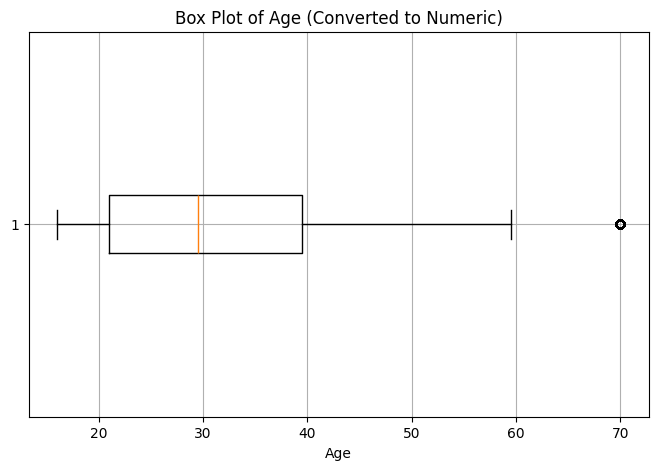

In [7]:
# Drop missing values
age_data = df['AgeNumeric'].dropna()

# Box plot of AgeNumeric
plt.figure(figsize=(8, 5))
plt.boxplot(age_data, vert=False)
plt.title('Box Plot of Age (Converted to Numeric)')
plt.xlabel('Age')
plt.grid(True)
plt.show()

### Task 2: Visualizing Relationships in Data


##### 1. Scatter Plot of `Age_numeric` and `ConvertedCompYearly`


Explore the relationship between age and compensation.



In [9]:
print(sorted(df.columns.to_list()))

['AIAcc', 'AIBen', 'AIChallenges', 'AIComplex', 'AIEthics', 'AINextLess integrated', 'AINextMore integrated', 'AINextMuch less integrated', 'AINextMuch more integrated', 'AINextNo change', 'AISearchDevAdmired', 'AISearchDevHaveWorkedWith', 'AISearchDevWantToWorkWith', 'AISelect', 'AISent', 'AIThreat', 'AIToolCurrently Using', 'AIToolInterested in Using', 'AIToolNot interested in Using', 'Age', 'AgeNumeric', 'BuildvsBuy', 'BuyNewTool', 'Check', 'CodingActivities', 'CompTotal', 'ConvertedCompYearly', 'Country', 'Currency', 'DatabaseAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DevType', 'EdLevel', 'EmbeddedAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'Employment', 'Frequency_1', 'Frequency_2', 'Frequency_3', 'Frustration', 'ICorPM', 'Industry', 'JobSat', 'JobSatPoints_1', 'JobSatPoints_10', 'JobSatPoints_11', 'JobSatPoints_4', 'JobSatPoints_5', 'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9', 'Knowledge_1', 'Knowledge_2', 'Knowledg

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Create a simplified AgeGroup column
def simplify_age(age):
    if age in ['55-64 years old', '65 years or older']:
        return '55+ years old'
    elif age in ['18-24 years old', '25-34 years old', '35-44 years old', '45-54 years old']:
        return age
    else:
        return None  # exclude 'Under 18' and 'Prefer not to say'

df['AgeGroup'] = df['Age'].apply(simplify_age)

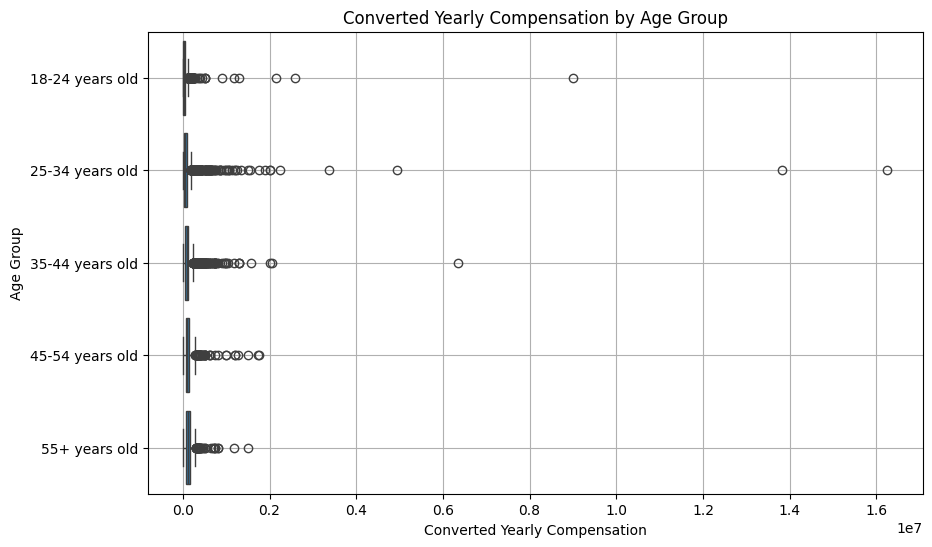

In [11]:
# your code goes here
import seaborn as sns
import matplotlib.pyplot as plt

# Define the correct age group order
age_order = [
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55+ years old'
]

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='ConvertedCompYearly', y='AgeGroup', order=age_order)
plt.title('Converted Yearly Compensation by Age Group')
plt.xlabel('Converted Yearly Compensation')
plt.ylabel('Age Group')
plt.grid(True)
plt.show()

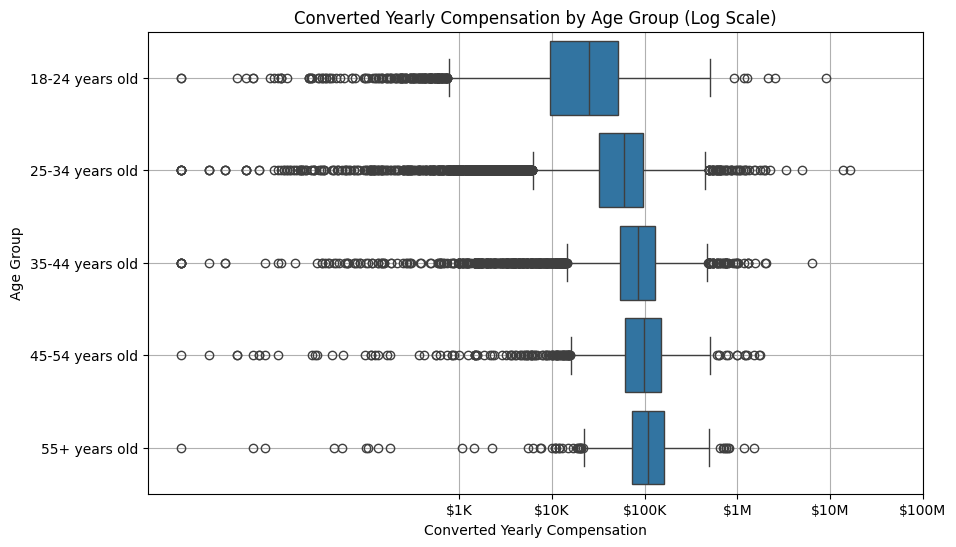

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Filter out nonpositive compensation values to avoid log10 issues
df_log = df[df['ConvertedCompYearly'] > 0].copy()
df_log['LogConvertedCompYearly'] = np.log10(df_log['ConvertedCompYearly'])

# Define age group order
age_order = [
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55+ years old'
]

# Set up tick marks and labels for log-scaled x-axis
log_ticks = [3, 4, 5, 6, 7, 8]  # corresponds to $1K to $100M
log_labels = ['$1K', '$10K', '$100K', '$1M', '$10M', '$100M']

# Plot using log scale
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_log, x='LogConvertedCompYearly', y='AgeGroup', order=age_order)
plt.xticks(ticks=log_ticks, labels=log_labels)
plt.xlabel('Converted Yearly Compensation')
plt.ylabel('Age Group')
plt.title('Converted Yearly Compensation by Age Group (Log Scale)')
plt.grid(True)
plt.show()

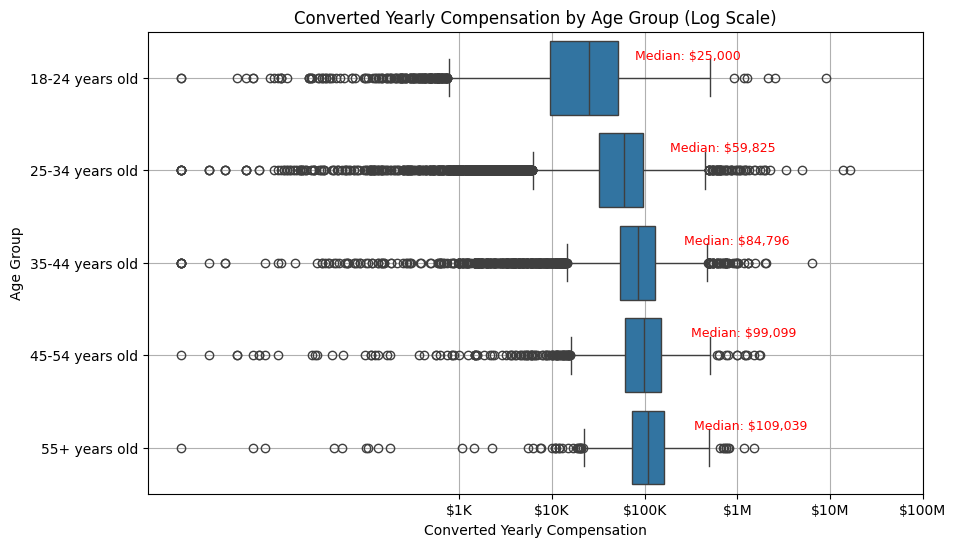

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Filter out nonpositive values and compute log10
df_log = df[df['ConvertedCompYearly'] > 0].copy()
df_log['LogConvertedCompYearly'] = np.log10(df_log['ConvertedCompYearly'])

# Define age order
age_order = [
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55+ years old'
]

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_log, x='LogConvertedCompYearly', y='AgeGroup', order=age_order)

# Set log ticks and labels
log_ticks = [3, 4, 5, 6, 7, 8]
log_labels = ['$1K', '$10K', '$100K', '$1M', '$10M', '$100M']
plt.xticks(ticks=log_ticks, labels=log_labels)
plt.xlabel('Converted Yearly Compensation')
plt.ylabel('Age Group')
plt.title('Converted Yearly Compensation by Age Group (Log Scale)')
plt.grid(True)

# Annotate medians
y_position_offset = -0.2  # <-- adjust this value if needed
for i, group in enumerate(age_order):
    group_data = df_log[df_log['AgeGroup'] == group]['ConvertedCompYearly']
    if not group_data.empty:
        median_val = group_data.median()
        median_log = np.log10(median_val)
        plt.text(median_log + 0.5, i + y_position_offset,
                 f'Median: ${median_val:,.0f}', color='red', fontsize=9)

plt.show()

##### 2. Bubble Plot of `ConvertedCompYearly` and `JobSatPoints_6` with `Age_numeric` as Bubble Size


Explore how compensation and job satisfaction are related, with age as the bubble size.


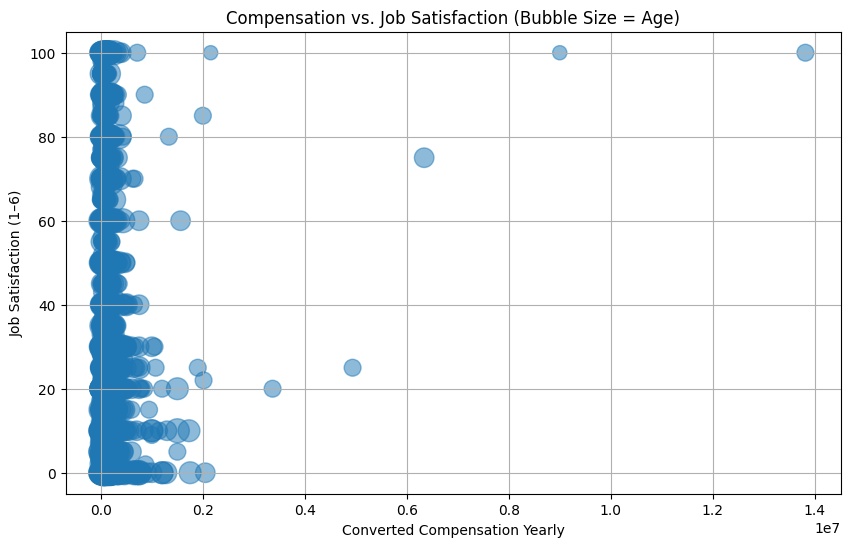

In [19]:
## Write your code here
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(
    df['ConvertedCompYearly'],
    df['JobSatPoints_6'],
    s=df['AgeNumeric']*5,  # Scale the bubble size for visibility
    alpha=0.5
)
plt.xlabel('Converted Compensation Yearly')
plt.ylabel('Job Satisfaction (1–6)')
plt.title('Compensation vs. Job Satisfaction (Bubble Size = Age)')
plt.grid(True)
plt.show()


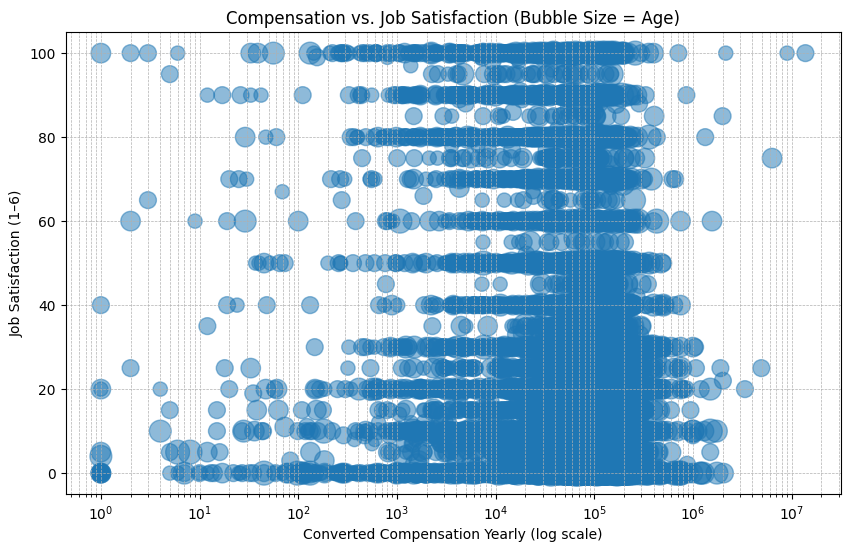

In [20]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
plt.scatter(
    df['ConvertedCompYearly'],
    df['JobSatPoints_6'],
    s=df['AgeNumeric']*5,
    alpha=0.5
)
plt.xscale('log')  # Apply logarithmic scale to x-axis
plt.xlabel('Converted Compensation Yearly (log scale)')
plt.ylabel('Job Satisfaction (1–6)')
plt.title('Compensation vs. Job Satisfaction (Bubble Size = Age)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


/tmp/ipykernel_299/3472984666.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CompBin'] = pd.qcut(df_filtered['ConvertedCompYearly'], q=5, labels=[


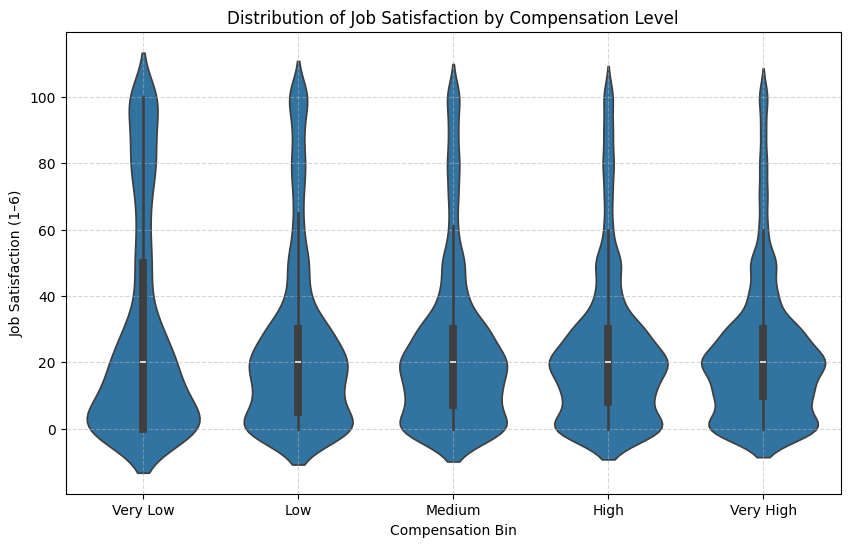

In [21]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Filter to valid data
df_filtered = df[(df['ConvertedCompYearly'] > 0) & (df['JobSatPoints_6'].notna())]

# Bin compensation into quantile-based bins
df_filtered['CompBin'] = pd.qcut(df_filtered['ConvertedCompYearly'], q=5, labels=[
    'Very Low', 'Low', 'Medium', 'High', 'Very High'
])

plt.figure(figsize=(10, 6))
sns.violinplot(data=df_filtered, x='CompBin', y='JobSatPoints_6', inner='box')
plt.xlabel('Compensation Bin')
plt.ylabel('Job Satisfaction (1–6)')
plt.title('Distribution of Job Satisfaction by Compensation Level')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


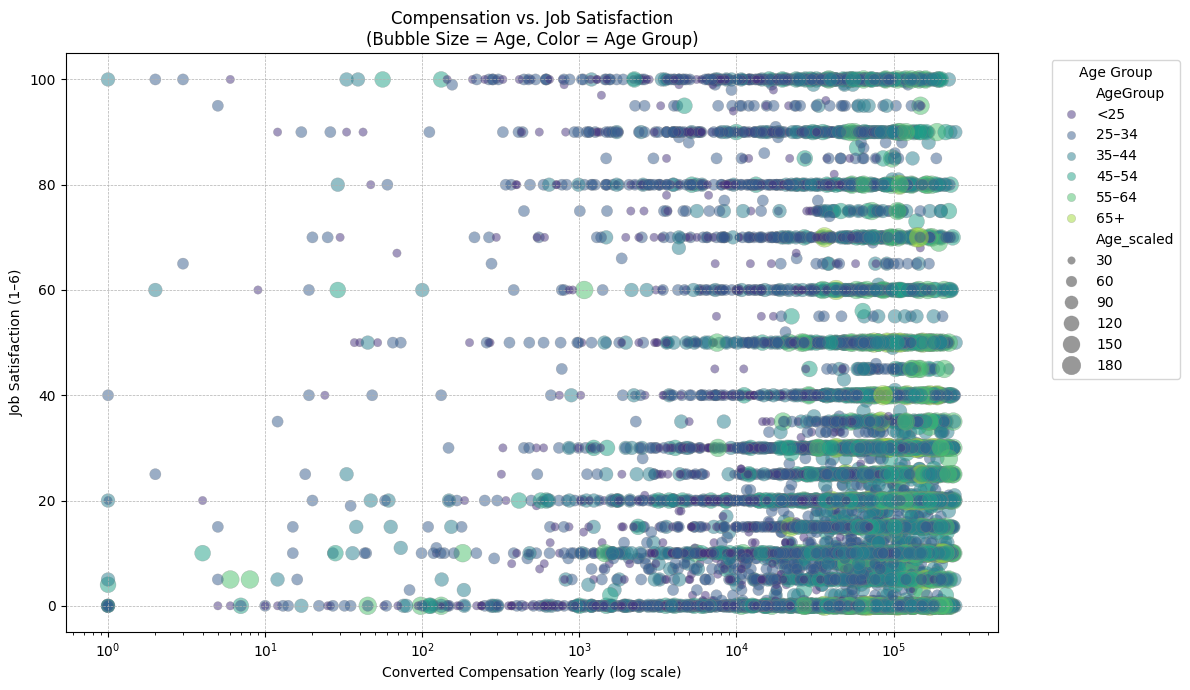

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Step 1: Filter out invalid or extreme values
df_filtered = df[
    (df['ConvertedCompYearly'] > 0) &
    (df['ConvertedCompYearly'] < 250000) &
    (df['JobSatPoints_6'].notna()) &
    (df['AgeNumeric'].notna())
].copy()

# Step 2: Scale Age_numeric for bubble size
scaler = MinMaxScaler(feature_range=(20, 200))
df_filtered['Age_scaled'] = scaler.fit_transform(df_filtered[['AgeNumeric']])

# Step 3: Create age groups for color coding
df_filtered['AgeGroup'] = pd.cut(df_filtered['AgeNumeric'],
                                 bins=[0, 25, 35, 45, 55, 65, 100],
                                 labels=['<25', '25–34', '35–44', '45–54', '55–64', '65+'])

# Step 4: Plot bubble chart
plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=df_filtered,
    x='ConvertedCompYearly',
    y='JobSatPoints_6',
    size='Age_scaled',
    hue='AgeGroup',
    palette='viridis',
    sizes=(20, 200),
    alpha=0.5,
    edgecolor='gray',
    linewidth=0.3
)

# Step 5: Formatting
plt.xscale('log')
plt.xlabel('Converted Compensation Yearly (log scale)')
plt.ylabel('Job Satisfaction (1–6)')
plt.title('Compensation vs. Job Satisfaction\n(Bubble Size = Age, Color = Age Group)')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Age Group')
plt.tight_layout()
plt.show()


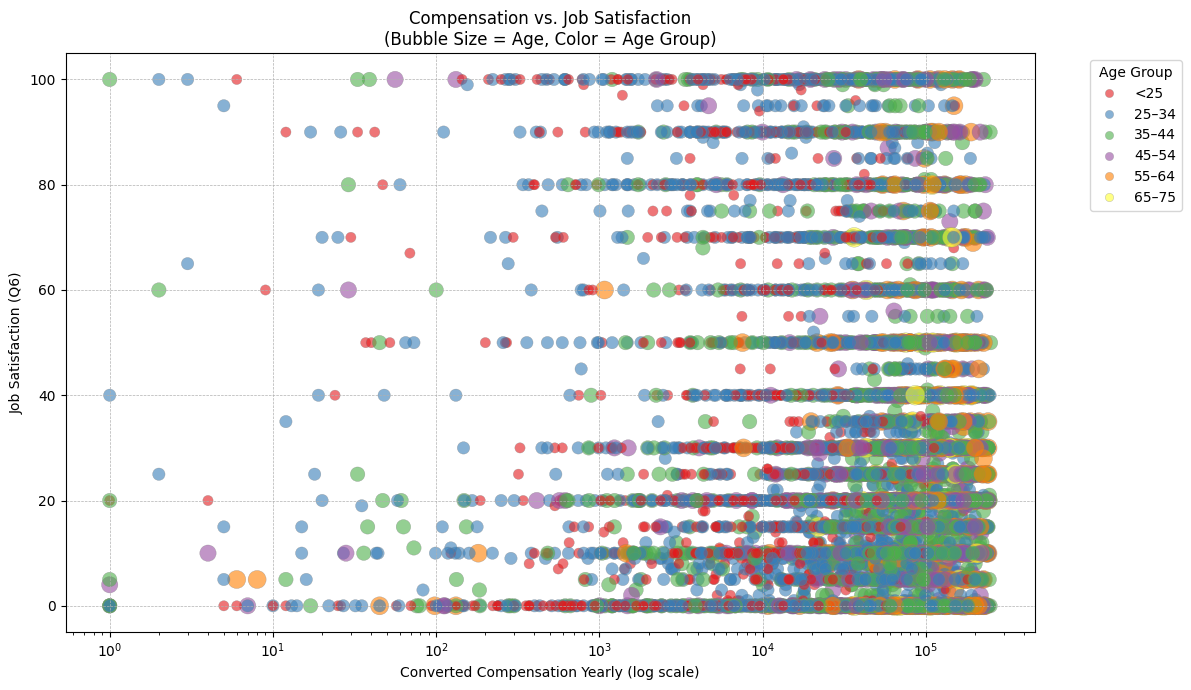

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Step 1: Filter to valid ranges for compensation and age
df_filtered = df[
    (df['ConvertedCompYearly'] > 0) &
    (df['ConvertedCompYearly'] < 250000) &
    (df['JobSatPoints_6'].notna()) &
    (df['AgeNumeric'].notna()) &
    (df['AgeNumeric'] >= 16) & (df['AgeNumeric'] <= 75)
].copy()

# Step 2: Scale Age_numeric to produce reasonable bubble sizes
scaler = MinMaxScaler(feature_range=(40, 200))
df_filtered['Age_scaled'] = scaler.fit_transform(df_filtered[['AgeNumeric']])

# Step 3: Categorize age into bins for coloring
df_filtered['AgeGroup'] = pd.cut(df_filtered['AgeNumeric'],
                                 bins=[15, 25, 35, 45, 55, 65, 75],
                                 labels=['<25', '25–34', '35–44', '45–54', '55–64', '65–75'])

# Step 4: Plot the improved bubble chart
plt.figure(figsize=(12, 7))
scatter = sns.scatterplot(
    data=df_filtered,
    x='ConvertedCompYearly',
    y='JobSatPoints_6',
    hue='AgeGroup',
    size='Age_scaled',
    sizes=(40, 200),
    palette='Set1',
    alpha=0.6,
    edgecolor='gray',
    linewidth=0.3,
    legend='brief'
)

# Step 5: Format axes and legend
plt.xscale('log')
plt.xlabel('Converted Compensation Yearly (log scale)')
plt.ylabel('Job Satisfaction (Q6)')
plt.title('Compensation vs. Job Satisfaction\n(Bubble Size = Age, Color = Age Group)')
plt.grid(True, linestyle='--', linewidth=0.5)

# Adjust legend: only show AgeGroup (color)
handles, labels = scatter.get_legend_handles_labels()
# Keep only color legend entries
agegroup_labels = ['<25', '25–34', '35–44', '45–54', '55–64', '65–75']
filtered_handles = [h for h, l in zip(handles, labels) if l in agegroup_labels]
filtered_labels = [l for l in labels if l in agegroup_labels]
plt.legend(filtered_handles, filtered_labels, title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


### Task 3: Visualizing Composition of Data with Bar Charts


##### 1. Horizontal Bar Chart of `MainBranch` Distribution


Visualize the distribution of respondents’ primary roles to understand their professional focus.



In [26]:
## Write your code here
print(df['MainBranch'].dropna().unique())

['I am a developer by profession' 'I am learning to code'
 'I code primarily as a hobby'
 'I am not primarily a developer, but I write code sometimes as part of my work/studies'
 'I used to be a developer by profession, but no longer am']


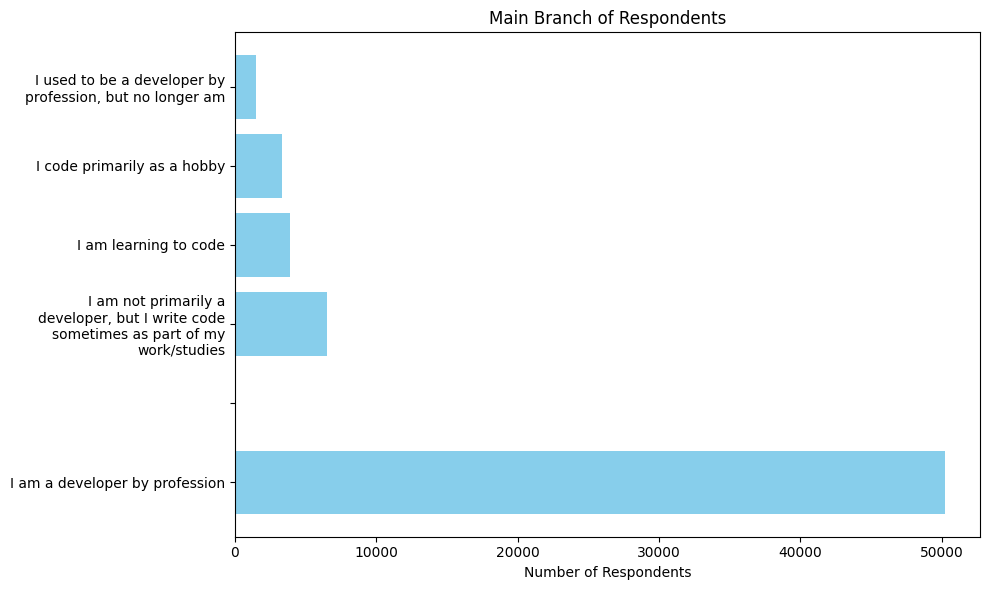

In [27]:
branch_counts = df['MainBranch'].value_counts()

import matplotlib.pyplot as plt
import textwrap

# Wrap text labels (at 30 characters)
wrapped_labels = [textwrap.fill(label, width=30) for label in branch_counts.index]

# Insert blank lines between labels for readability
spaced_labels = []
spaced_counts = []
for label, count in zip(wrapped_labels, branch_counts):
    spaced_labels.extend([label, ''])  # add blank row
    spaced_counts.extend([count, 0])   # blank row has zero count

# Plot
plt.figure(figsize=(10, 6))
plt.barh(spaced_labels, spaced_counts, color='skyblue')
plt.xlabel('Number of Respondents')
plt.title('Main Branch of Respondents')
plt.tight_layout()
plt.show()

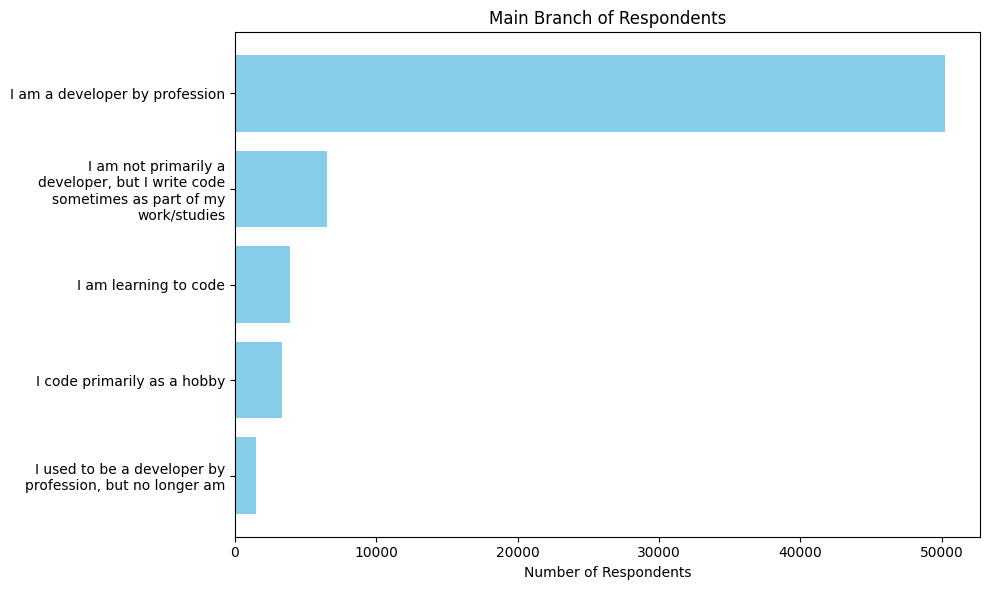

In [28]:
import matplotlib.pyplot as plt
import textwrap

# Get counts in ascending order to flip bars (largest at top)
branch_counts = df['MainBranch'].value_counts(ascending=True)

# Wrap text labels
wrapped_labels = [textwrap.fill(label, width=30) for label in branch_counts.index]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(wrapped_labels, branch_counts.values, color='skyblue')
plt.xlabel('Number of Respondents')
plt.title('Main Branch of Respondents')
plt.tight_layout()
plt.show()

##### 2. Vertical Bar Chart of Top 5 Programming Languages Respondents Want to Work With


Identify the most desired programming languages based on `LanguageWantToWorkWith`.



/tmp/ipykernel_299/1302649155.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_langs_df, x='Language', y='Count', palette='muted')


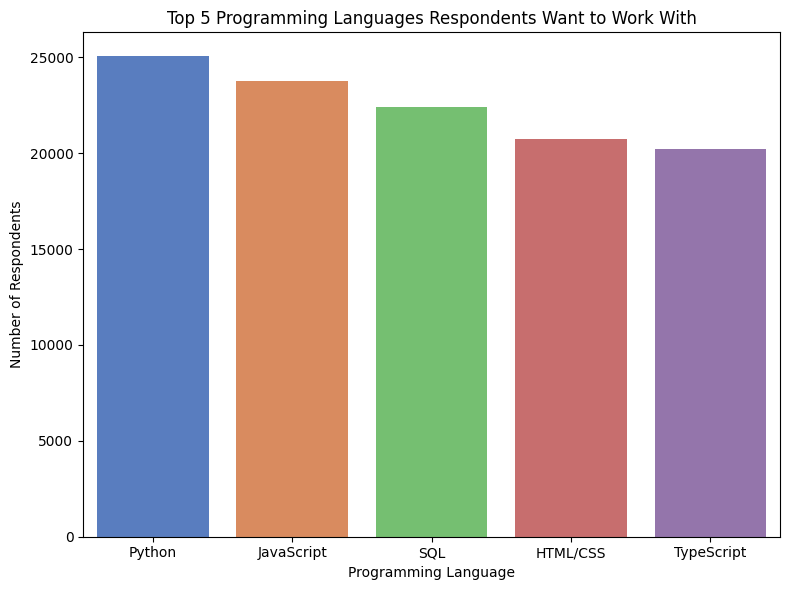

In [29]:
## Write your code here
from collections import Counter

# Drop missing values
lang_series = df['LanguageWantToWorkWith'].dropna()

# Split and flatten the language lists
langs_flat = [lang.strip() for sublist in lang_series.str.split(';') for lang in sublist]

# Count frequency
top_langs = Counter(langs_flat).most_common(5)
top_langs_df = pd.DataFrame(top_langs, columns=['Language', 'Count'])

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(data=top_langs_df, x='Language', y='Count', palette='muted')
plt.title('Top 5 Programming Languages Respondents Want to Work With')
plt.ylabel('Number of Respondents')
plt.xlabel('Programming Language')
plt.tight_layout()
plt.show()


##### 3. Stacked Bar Chart of Median `JobSatPoints_6` and `JobSatPoints_7` by Age Group


Compare job satisfaction metrics across different age groups with a stacked bar chart.


/tmp/ipykernel_299/3338357824.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('AgeGroup')[['JobSatPoints_6', 'JobSatPoints_7']].median().reset_index()


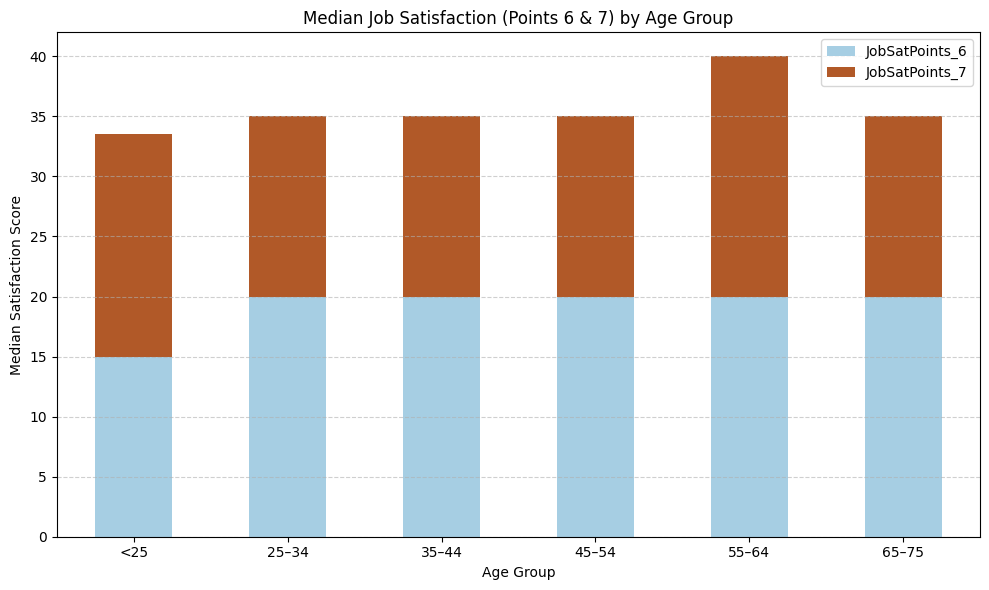

In [30]:
## Write your code here
# Create age group bins
df['AgeGroup'] = pd.cut(df['AgeNumeric'], bins=[15, 25, 35, 45, 55, 65, 75],
                        labels=['<25', '25–34', '35–44', '45–54', '55–64', '65–75'])

# Group by AgeGroup and compute medians
grouped = df.groupby('AgeGroup')[['JobSatPoints_6', 'JobSatPoints_7']].median().reset_index()

# Plot
grouped.set_index('AgeGroup').plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Paired')
plt.title('Median Job Satisfaction (Points 6 & 7) by Age Group')
plt.ylabel('Median Satisfaction Score')
plt.xlabel('Age Group')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


##### 4. Bar Chart of Database Popularity (`DatabaseHaveWorkedWith`)


Identify the most commonly used databases among respondents by visualizing `DatabaseHaveWorkedWith`.



/tmp/ipykernel_299/3882154124.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_dbs_df, x='Count', y='Database', palette='crest')


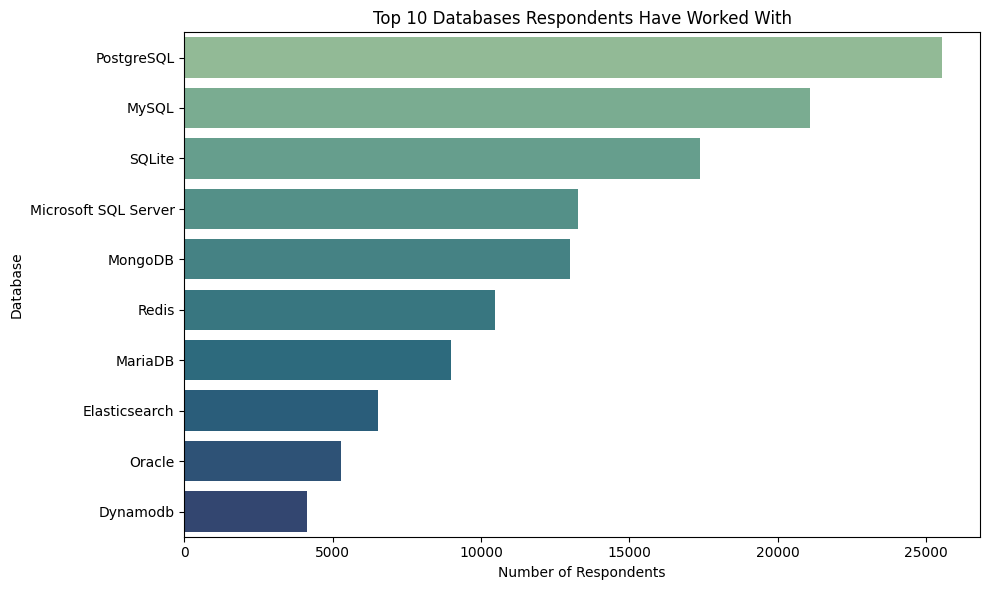

In [31]:
## Write your code here
# Drop missing values
db_series = df['DatabaseHaveWorkedWith'].dropna()

# Split and flatten the database list
db_flat = [db.strip() for sublist in db_series.str.split(';') for db in sublist]

# Count frequencies
top_dbs = Counter(db_flat).most_common(10)
top_dbs_df = pd.DataFrame(top_dbs, columns=['Database', 'Count'])

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_dbs_df, x='Count', y='Database', palette='crest')
plt.title('Top 10 Databases Respondents Have Worked With')
plt.xlabel('Number of Respondents')
plt.ylabel('Database')
plt.tight_layout()
plt.show()


### Task 4: Visualizing Comparison of Data with Bar Charts


##### 1. Grouped Bar Chart of Median `ConvertedCompYearly` for Different Age Groups


Compare median compensation across multiple age groups with a grouped bar chart.



/tmp/ipykernel_299/400946790.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_comp = df.groupby('AgeGroup')['ConvertedCompYearly'].median().reset_index()
/tmp/ipykernel_299/400946790.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_comp, x='AgeGroup', y='ConvertedCompYearly', palette='Blues_d')


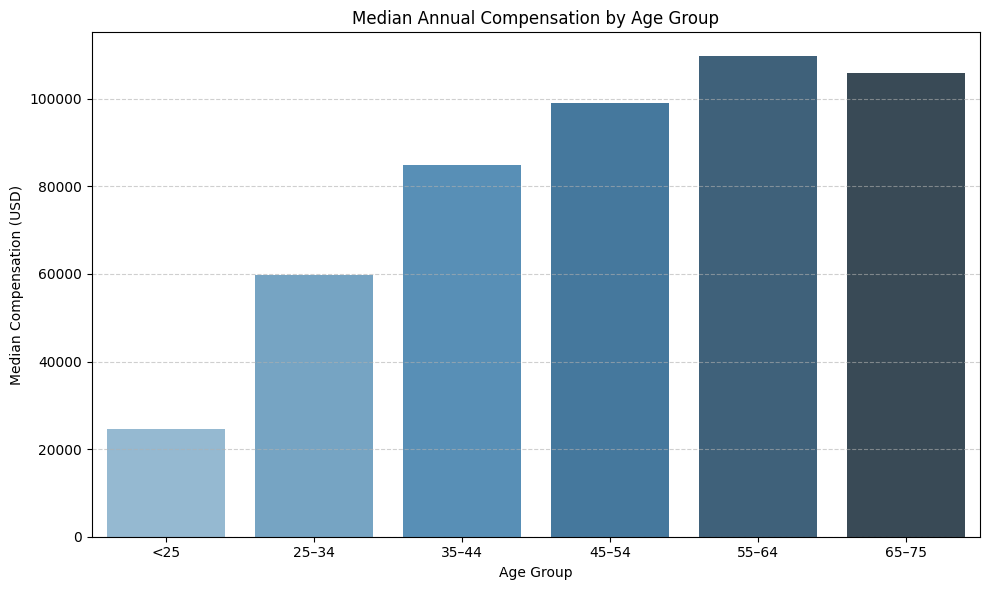

In [33]:
## Write your code here
# Bin AgeNumeric into age groups
df['AgeGroup'] = pd.cut(df['AgeNumeric'],
                        bins=[15, 25, 35, 45, 55, 65, 75],
                        labels=['<25', '25–34', '35–44', '45–54', '55–64', '65–75'])

# Group by AgeGroup and calculate median compensation
grouped_comp = df.groupby('AgeGroup')['ConvertedCompYearly'].median().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_comp, x='AgeGroup', y='ConvertedCompYearly', palette='Blues_d')
plt.title('Median Annual Compensation by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Compensation (USD)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


/tmp/ipykernel_299/990685681.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_comp = df.groupby('AgeGroup')['ConvertedCompYearly'].median().reset_index()
/tmp/ipykernel_299/990685681.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=grouped_comp, x='AgeGroup', y='ConvertedCompYearly', palette='Blues_d')


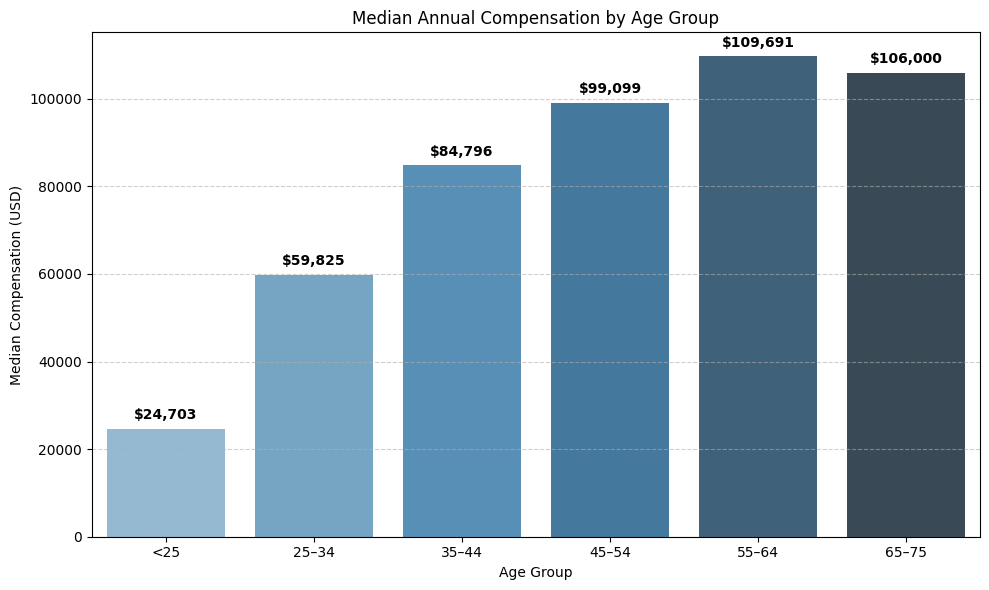

In [36]:
# Bin AgeNumeric into age groups
df['AgeGroup'] = pd.cut(df['AgeNumeric'],
                        bins=[15, 25, 35, 45, 55, 65, 75],
                        labels=['<25', '25–34', '35–44', '45–54', '55–64', '65–75'])

# Group by AgeGroup and calculate median compensation
grouped_comp = df.groupby('AgeGroup')['ConvertedCompYearly'].median().reset_index()

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=grouped_comp, x='AgeGroup', y='ConvertedCompYearly', palette='Blues_d')
plt.title('Median Annual Compensation by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Compensation (USD)')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Annotate each bar
for i, row in grouped_comp.iterrows():
    ax.text(
        x=i, 
        y=row['ConvertedCompYearly'] + 1500,  # position a bit above the bar
        s=f"${row['ConvertedCompYearly']:,.0f}",  # format as currency with commas
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

plt.tight_layout()
plt.show()


##### 2. Bar Chart of Respondent Count by Country


In [32]:
country_mapping = {
    'United States of America': 'USA',
    'United Kingdom of Great Britain and Northern Ireland': 'UK and N. Ireland',
    'Iran, Islamic Republic of...': 'Iran',
    'Hong Kong (S.A.R.)': 'Hong Kong',
    'Venezuela, Bolivarian Republic of...': 'Venezuela',
    'Democratic People\'s Republic of Korea': 'North Korea',
    'Republic of Korea': 'South Korea',
    'Russian Federation': 'Russia',
    'Lao People\'s Democratic Republic': 'Laos',
    'Syrian Arab Republic': 'Syria',
    'United Republic of Tanzania': 'Tanzania',
    'Republic of Moldova': 'Moldova',
    'Palestinian Territory': 'Palestine',
    'Micronesia, Federated States of...': 'Micronesia',
    'Congo, Republic of the...': 'Congo',
    'Democratic Republic of the Congo': 'DR Congo',
    'Bosnia and Herzegovina': 'Bosnia',
    'Libyan Arab Jamahiriya': 'Libya',
    'Bolivia, Plurinational State of...': 'Bolivia'
}

# Apply the mapping
df['Country'] = df['Country'].replace(country_mapping)

# Optional: fill in missing values
df['Country'] = df['Country'].fillna('Unknown')

Show the distribution of respondents by country to see which regions are most represented.



/tmp/ipykernel_299/2363859936.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.values, y=country_counts.index, palette='crest')


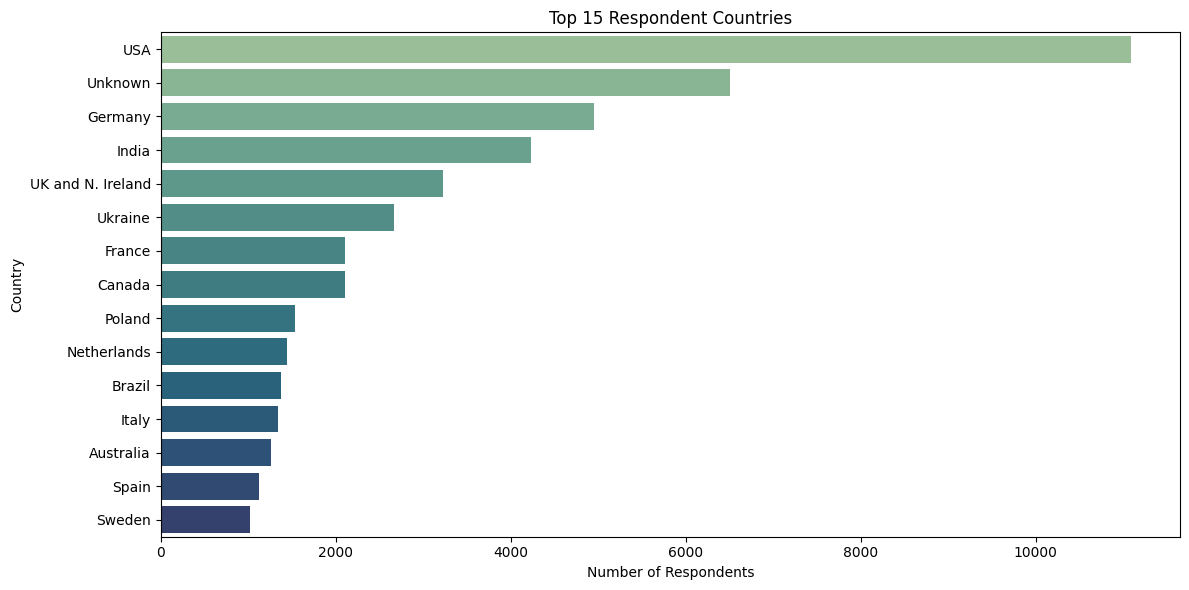

In [37]:
## Write your code here
# Apply the provided mapping
df['Country'] = df['Country'].replace(country_mapping)

# Fill missing values if needed
df['Country'] = df['Country'].fillna('Unknown')

# Count respondents per country
country_counts = df['Country'].value_counts().head(15)  # show top 15

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=country_counts.values, y=country_counts.index, palette='crest')
plt.title('Top 15 Respondent Countries')
plt.xlabel('Number of Respondents')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


### Final Step: Review


This lab demonstrates how to create and interpret different types of bar charts, allowing you to analyze the composition, comparison, and distribution of categorical data in the Stack Overflow dataset, including main professional branches, programming language preferences, and compensation by age group. Bar charts effectively compare counts and median values across various categories.


## Summary


After completing this lab, you will be able to:
- Create a horizontal bar chart to visualize the distribution of respondents' primary roles, helping to understand their professional focus.
- Develop a vertical bar chart to identify the most desired programming languages based on the LanguageWantToWorkWith variable.
- Use a stacked bar chart to compare job satisfaction metrics across different age groups.
- Create a bar chart to visualize the most commonly used databases among respondents using the DatabaseHaveWorkedWith variable.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
